In [1]:
from utilities import *
from plot_utilities import *

np.random.seed(42)

In [2]:
def gen_gamma_mean(r, eta):
    return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)

def gen_gamma_variance(r, eta):
    mean = gen_gamma_mean(r, eta)
    second_moment = scipy.special.gamma((eta+3.5)/r) / scipy.special.gamma((eta+1.5)/r)
    return second_moment - mean**2

def find_eta_for_target_mean(r, target_mean):
    def objective(eta):
        return (gen_gamma_mean(r, eta) - target_mean)**2
    result = scipy.optimize.minimize_scalar(objective)
    return result.x

In [161]:
all_r_vals = []
all_eta_vals = []
target_means = np.round(np.arange(1.2, 4, 0.2), 2)

for target_mean in target_means:

    r_values = []
    eta_values = []
    mean_values = []
    variance_values = []

    for r in np.logspace(0, 3, 1000):  # r from 1 to 1000
        eta = find_eta_for_target_mean(r, target_mean)
        mean = gen_gamma_mean(r, eta)
        variance = gen_gamma_variance(r, eta)
        if variance == np.nan or mean == np.nan:
            break
        
        r_values.append(r)
        eta_values.append(eta)
        mean_values.append(mean)
        variance_values.append(variance)

    all_r_vals.append(np.array(r_values))
    all_eta_vals.append(np.array(eta_values))

C:\Users\yashd\AppData\Local\Temp\ipykernel_42512\1099617282.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


(0.0, 150.0)

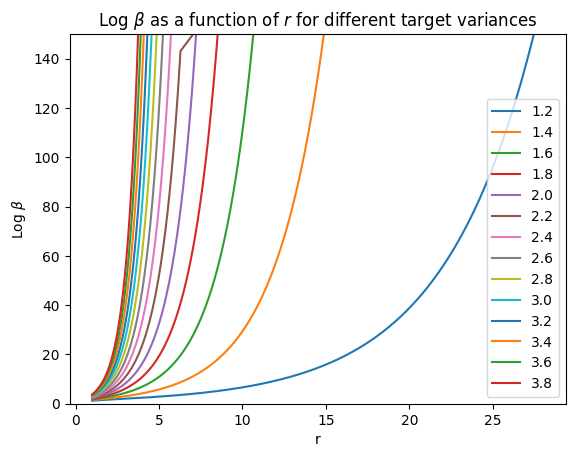

In [169]:
for i, (r_values, eta_values) in enumerate(zip(all_r_vals, all_eta_vals)):
    all_beta_vals = np.divide((eta_values + 1.5), r_values)
    sns.lineplot(x = r_values, 
                 y = all_beta_vals,
                 label = f'{target_means[i]}'
                 )
plt.title(f'Log $\\beta$ as a function of $r$ for different target variances')
plt.xlabel('r')
plt.ylabel(f'Log $\\beta$')
#plt.xlim(0, 20)
plt.ylim(0, 150)

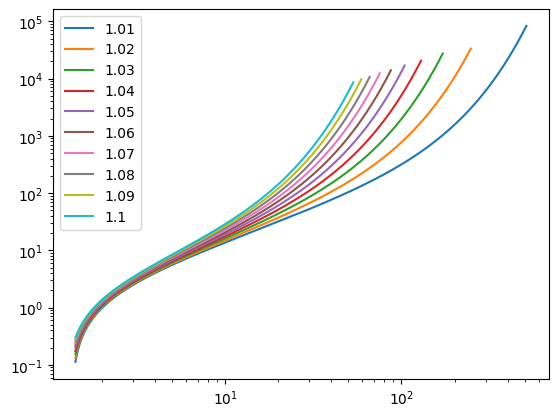

In [136]:
filter_vals = np.arange(len(r_values))[50:]
for i, (r_values, eta_values) in enumerate(zip(all_r_vals, all_eta_vals)):
    sns.lineplot(x = r_values[filter_vals], y = eta_values[filter_vals], label = f'{target_means[i]}')
    plt.xscale('log')
    plt.yscale('log')

C:\Users\yashd\AppData\Local\Temp\ipykernel_42512\2306471237.py:5: RuntimeWarning: invalid value encountered in log
  sns.regplot(x=np.log(r_values)[start:], y=np.log(eta_values)[start:],


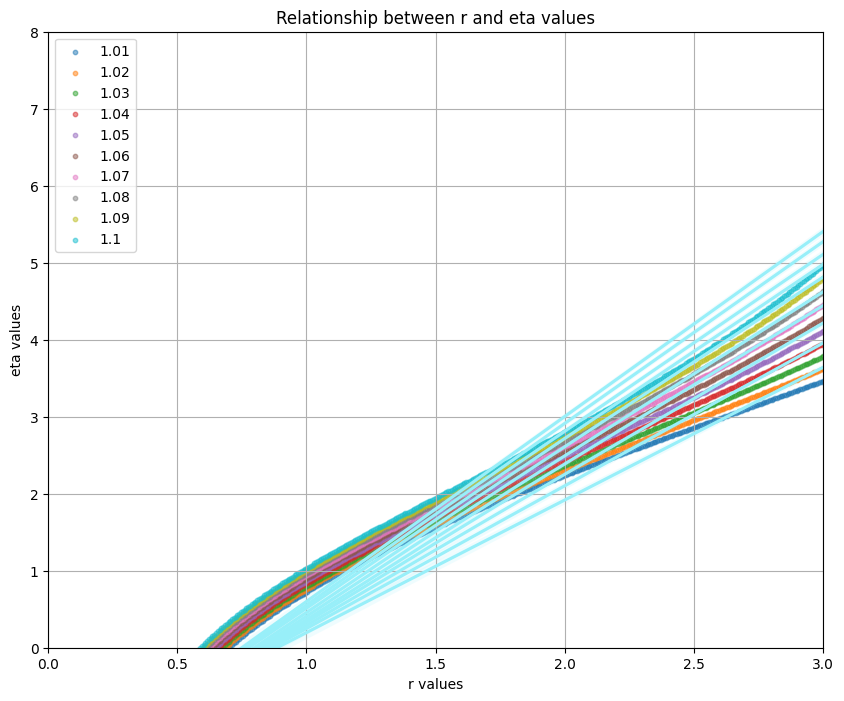

In [137]:
fig, ax = plt.subplots(figsize=(10, 8))
start = 0

for i, (r_values, eta_values) in enumerate(zip(all_r_vals, all_eta_vals)):
    sns.regplot(x=np.log(r_values)[start:], y=np.log(eta_values)[start:], 
                scatter_kws={'s': 10, 'alpha': 0.5},
                line_kws={'color': 'xkcd:robin\'s egg blue'},
                label=f'{target_means[i]}',
                ax=ax)

plt.xlim(0, 3)
plt.ylim(0, 8)

#ax.set_xscale('log')
#ax.set_yscale('log')

plt.xlabel('r values')
plt.ylabel('eta values')
plt.title('Relationship between r and eta values')
plt.legend()
plt.grid(which='both')
plt.show()

C:\Users\yashd\AppData\Local\Temp\ipykernel_42512\1502963218.py:5: RuntimeWarning: invalid value encountered in log
  sns.regplot(x=np.log(r_values)[start:]-3, y=2*np.log(eta_values)[start:],
C:\Users\yashd\AppData\Local\Temp\ipykernel_42512\1502963218.py:10: RuntimeWarning: invalid value encountered in log
  sns.regplot(x=np.log(r_values)[start:]-3, y=-2*np.log(eta_values)[start:],
C:\Users\yashd\AppData\Local\Temp\ipykernel_42512\1502963218.py:16: RuntimeWarning: invalid value encountered in log
  sns.regplot(x=-np.log(r_values)[start:], y=2*np.log(eta_values)[start:],
C:\Users\yashd\AppData\Local\Temp\ipykernel_42512\1502963218.py:21: RuntimeWarning: invalid value encountered in log
  sns.regplot(x=-np.log(r_values)[start:], y=-2*np.log(eta_values)[start:],
C:\Users\yashd\AppData\Local\Temp\ipykernel_42512\1502963218.py:5: RuntimeWarning: divide by zero encountered in log
  sns.regplot(x=np.log(r_values)[start:]-3, y=2*np.log(eta_values)[start:],
C:\Users\yashd\AppData\Local\Temp\ip

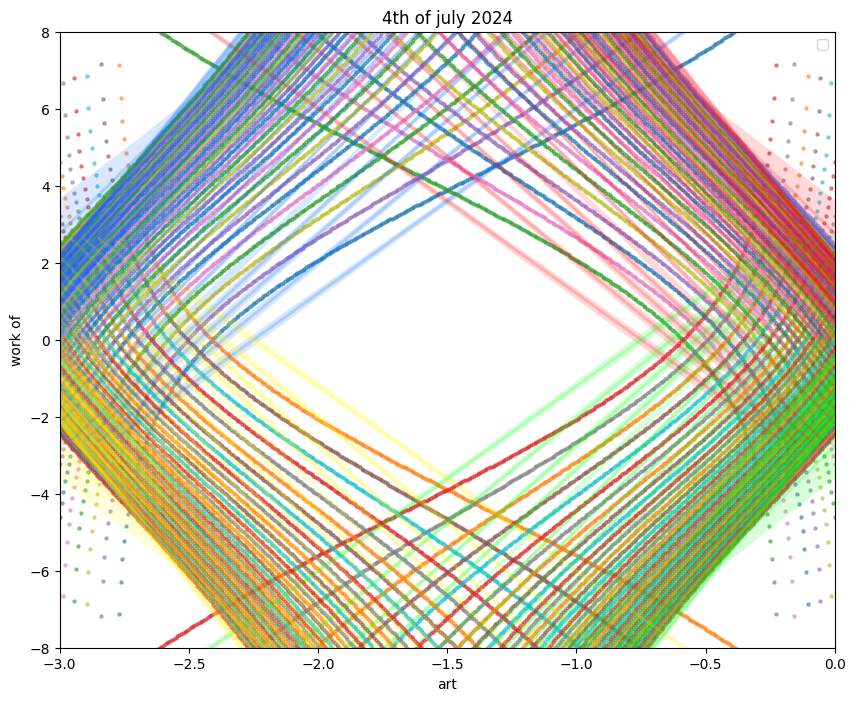

In [124]:
fig, ax = plt.subplots(figsize=(10, 8))
start = 0

for i, (r_values, eta_values) in enumerate(zip(all_r_vals, all_eta_vals)):
    sns.regplot(x=np.log(r_values)[start:]-3, y=2*np.log(eta_values)[start:], 
                scatter_kws={'s': 5, 'alpha': 0.5},
                line_kws={'color': 'xkcd:bright blue', 'alpha' : 0.2},
                #label=f'{target_means[i]}',
                ax=ax)
    sns.regplot(x=np.log(r_values)[start:]-3, y=-2*np.log(eta_values)[start:], 
                scatter_kws={'s': 5, 'alpha': 0.5},
                line_kws={'color': 'xkcd:bright yellow', 'alpha' : 0.2},
                #label=f'-{target_means[i]}',
                ax=ax)
    
    sns.regplot(x=-np.log(r_values)[start:], y=2*np.log(eta_values)[start:], 
                scatter_kws={'s': 5, 'alpha': 0.5},
                line_kws={'color': 'xkcd:bright red', 'alpha' : 0.2},
                #label=f'{target_means[i]}',
                ax=ax)
    sns.regplot(x=-np.log(r_values)[start:], y=-2*np.log(eta_values)[start:], 
                scatter_kws={'s': 5, 'alpha': 0.5},
                line_kws={'color': 'xkcd:bright green', 'alpha' : 0.2},
                #label=f'-{target_means[i]}',
                ax=ax)

plt.xlim(-3, 0)
plt.ylim(-8, 8)

#ax.set_xscale('log')
#ax.set_yscale('log')

plt.xlabel('art')
plt.ylabel('work of')
plt.title('4th of july 2024')
plt.legend()
#plt.grid(which='both')
plt.show()

C:\Users\yashd\AppData\Local\Temp\ipykernel_42512\182390930.py:5: RuntimeWarning: invalid value encountered in log
  sns.regplot(x=np.log(r_values)[start:], y=np.log(eta_values)[start:],
C:\Users\yashd\AppData\Local\Temp\ipykernel_42512\182390930.py:5: RuntimeWarning: divide by zero encountered in log
  sns.regplot(x=np.log(r_values)[start:], y=np.log(eta_values)[start:],


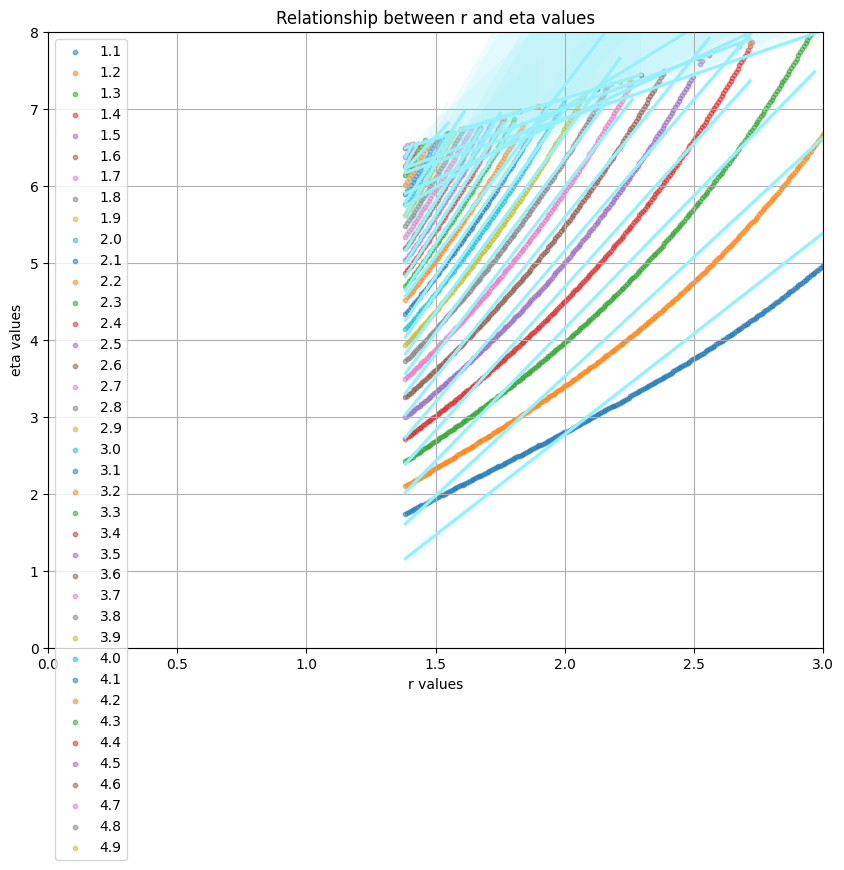

In [131]:
fig, ax = plt.subplots(figsize=(10, 8))
start = 200

for i, (r_values, eta_values) in enumerate(zip(all_r_vals, all_eta_vals)):
    sns.regplot(x=np.log(r_values)[start:], y=np.log(eta_values)[start:], 
                scatter_kws={'s': 10, 'alpha': 0.5},
                line_kws={'color': 'xkcd:robin\'s egg blue'},
                label=f'{target_means[i]}',
                ax=ax)

plt.xlim(0, 3)
plt.ylim(0, 8)

#ax.set_xscale('log')
#ax.set_yscale('log')

plt.xlabel('r values')
plt.ylabel('eta values')
plt.title('Relationship between r and eta values')
plt.legend()
plt.grid(which='both')
plt.show()

<Axes: >

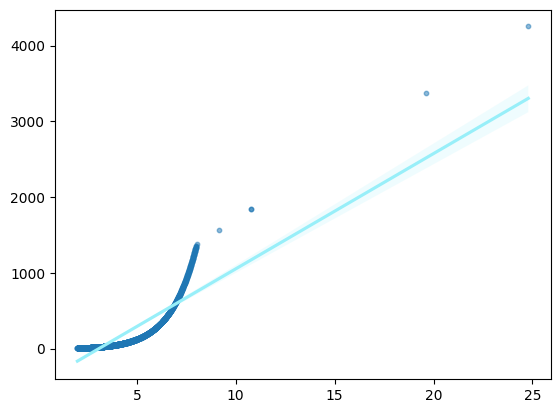

In [85]:
sns.regplot(x=r_values[1000:-500], y=eta_values[1000:-500], 
                scatter_kws={'s': 10, 'alpha': 0.5},
                line_kws={'color': 'xkcd:robin\'s egg blue'},
                label=f'{target_means[i]}')

No Tail
No Tail


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:313: RuntimeWarning: overflow encountered in scalar power
  return (abs(r)/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:313: RuntimeWarning: invalid value encountered in scalar multiply
  return (abs(r)/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:319: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calli

ValueError: cannot convert float NaN to integer

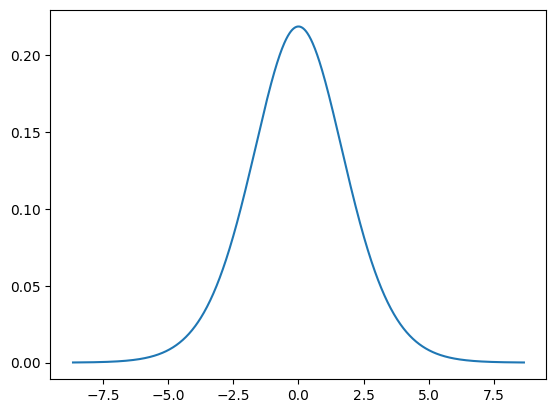

In [59]:
r_vals, eta_vals, target_mean = all_r_vals[i], all_eta_vals[i], target_means[i]
for i in range(0, len(r_vals), len(r_vals)//8)[1:-3]:
    xs, pdf = compute_prior_pdf(r_vals[i], eta_vals[i], n_samples=1000)
    plt.plot(xs, pdf, label = f'r = {round_to_sigfigs(r_vals[i], 4)}, eta = {round_to_sigfigs(eta_vals[i], 4)}')
plt.plot(xs, stats.norm(scale=target_mean).pdf(xs), label = f'Normal(0, {target_mean})')

plt.legend(loc='lower left')
plt.savefig('images/gengamma_gaussian_analysis_var2.png', bbox_inches = 'tight')

No Tail
No Tail
No Tail
No Tail


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:313: RuntimeWarning: overflow encountered in scalar power
  return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:313: RuntimeWarning: invalid value encountered in scalar multiply
  return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:319: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


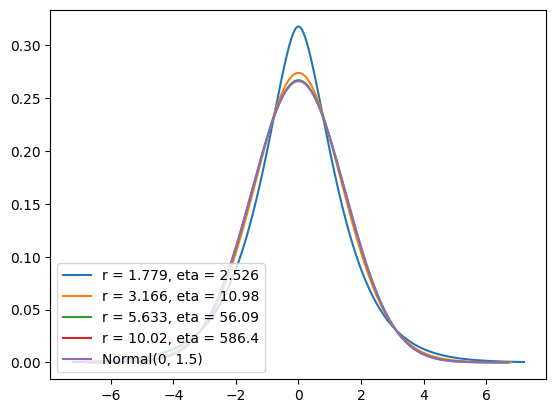

In [85]:
r_vals, eta_vals = r15_values, eta15_values
target_mean = 1.5
for i in range(0, len(r_vals), len(r_vals)//8)[1:-3]:
    xs, pdf = compute_prior_pdf(r_vals[i], eta_vals[i], n_samples=1000)
    plt.plot(xs, pdf, label = f'r = {round_to_sigfigs(r_vals[i], 4)}, eta = {round_to_sigfigs(eta_vals[i], 4)}')
plt.plot(xs, stats.norm(scale=1.5).pdf(xs), label = f'Normal(0, 1.5)')

plt.legend(loc='lower left')
plt.savefig('images/gengamma_gaussian_analysis_var15.png', bbox_inches = 'tight')

No Tail
No Tail
No Tail
No Tail


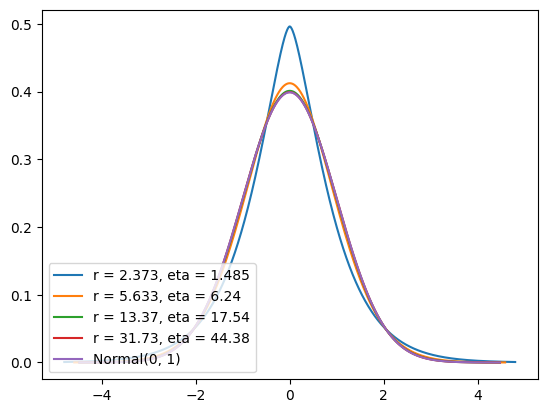

In [83]:
r_vals, eta_vals = r1_values, eta1_values
target_mean = 1
for i in range(0, len(r_vals), len(r_vals)//8)[1:-3]:
    xs, pdf = compute_prior_pdf(r_vals[i], eta_vals[i], n_samples=1000)
    plt.plot(xs, pdf, label = f'r = {round_to_sigfigs(r_vals[i], 4)}, eta = {round_to_sigfigs(eta_vals[i], 4)}')
plt.plot(xs, stats.norm(scale=target_mean).pdf(xs), label = f'Normal(0, {target_mean})')

plt.legend(loc='lower left')
plt.savefig('images/gengamma_gaussian_analysis_var1.png', bbox_inches = 'tight')

In [ ]:
xs1, pdf1 = compute_prior_pdf(r15_values[5], eta15_values[5])
xs2, pdf2 = compute_prior_pdf(32.30, 45.82)
xs3, pdf3 = compute_prior_pdf(8.11, 9.86)
for i in range(0, len(r2_values), len(r2_values)//10):
    

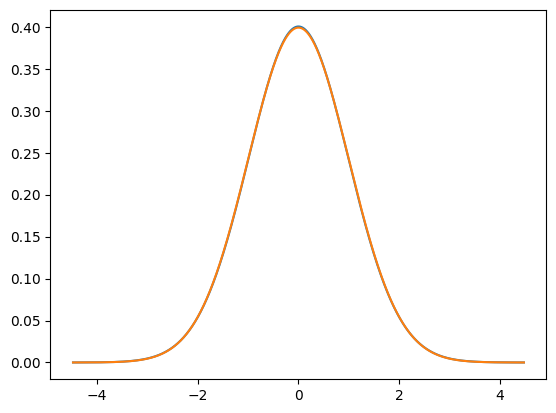

In [90]:
#plt.plot(xs1, stats.norm(scale=2).pdf(xs1), label = 'Normal')
plt.plot(xs1, pdf1, )
plt.plot(xs2, pdf2)
plt.legend()

No Tail
No Tail
No Tail


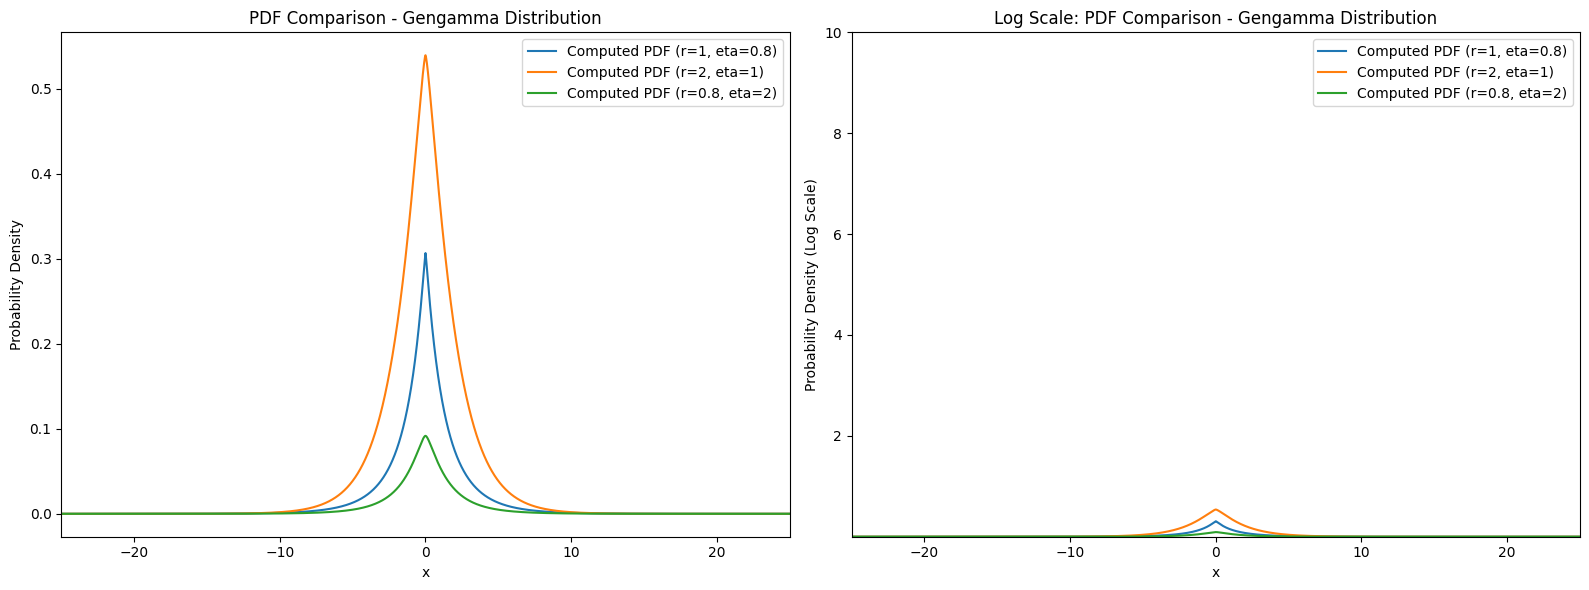

In [40]:
params_list = [(1, 0.8), (2, 1), (0.8, 2)]  # List of (r, eta) pairs for gengamma
sample_data = np.random.normal(0, 1, 1000)  # Optional sample data
fig = visualize_pdf(params_list, distro='gengamma')
plt.show()

No Tail


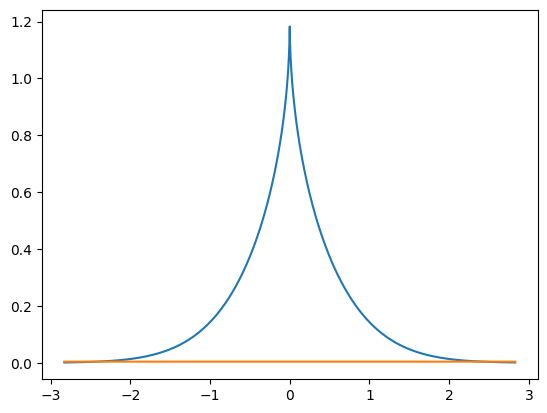

In [37]:
xs, pdf = compute_prior_pdf(r_test- 50, eta_test)
plt.plot(xs, pdf)
plt.plot(xs, stats.norm(scale = target_mean).pdf(xs))

In [54]:
def compute_distribution(params, distro, n_samples=10000, all_cdfs=None):
    xs = np.linspace(-30, 30, n_samples)
    if distro == 'gengamma':
        r, eta = params
        if all_cdfs and (r, eta) in all_cdfs:
            null_cdf = all_cdfs[(r, eta)]
        else:
            null_cdf = compute_prior_cdf(r=r, eta=eta, n_samples=n_samples)
        xs_pdf, computed_pdf = compute_prior_pdf(r, eta, tail_bound=0.01)
    elif distro in ['gaussian', 'normal']:
        null_cdf = stats.norm(scale=params).cdf
        computed_pdf = stats.norm(scale=params).pdf(xs)
        xs_pdf = xs
    elif distro == 'laplace':
        null_cdf = stats.laplace(scale=params).cdf
        computed_pdf = stats.laplace(scale=params).pdf(xs)
        xs_pdf = xs
    else:
        raise ValueError(f"Unsupported distribution: {distro}")
    return xs, null_cdf, xs_pdf, computed_pdf

def visualize_cdf(params, distro='gengamma', sample=None, n_samples=10000, interval=None, provided_loc=None, all_cdfs=None, layer=None, ax=None):
    xs, null_cdf, _, _ = compute_distribution(params, distro, n_samples, all_cdfs)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.set_xlim(left=-25, right=25)
    if interval:
        ax.set_xlim(left=interval[0], right=interval[1])
    
    ax.plot(xs, null_cdf(xs), label='Computed CDF')
    
    if sample is not None:
        sample = np.sort(sample)
        n = len(sample)
        ax.plot(sample, np.arange(1, n+1)/n, label='Empirical CDF')
        result = stats.ks_1samp(sample, null_cdf)
        distance = result.statistic
        location = result.statistic_location
        emp_cdf_at_loc = np.searchsorted(sample, location, side='right') / n
        computed_cdf_at_loc = null_cdf(location)
        ax.vlines(location, emp_cdf_at_loc, computed_cdf_at_loc, linestyles='--', 
                  label=f'Max Deviation: {np.round(distance, 6)}\nat x={np.round(location, 6)}', 
                  color='xkcd:bright red')
        
        if provided_loc is not None:
            emp_cdf_at_provided_loc = np.searchsorted(sample, provided_loc, side='right') / n
            computed_cdf_at_provided_loc = null_cdf(provided_loc)
            ax.vlines(provided_loc, emp_cdf_at_provided_loc, computed_cdf_at_provided_loc, 
                      linestyles='--', 
                      label=f'Deviation: {np.round(emp_cdf_at_provided_loc - computed_cdf_at_provided_loc, 6)}\nat x={np.round(provided_loc, 6)}', 
                      color='xkcd:shamrock green')
    
    if distro == 'gengamma':
        r, eta = params
        title = f'{f"Layer {layer}" if layer else ""} {"Empirical and " if sample is not None else ""}Computed CDF \n (r={r}, eta={eta})'
        if sample is not None:
            title += f' with p-value:{np.round(result.pvalue, 8)}'
    else:
        title = f'{f"Layer {layer}" if layer else ""} {"Empirical and " if sample is not None else ""}Computed CDF \n {distro} (0, {params})'
    
    ax.set_title(title)
    ax.legend()
    
    if ax is None:
        return fig
    else:
        return ax

def visualize_pdf(params, distro='gengamma', sample=None, n_samples=10000, interval=None, bw=0.05, log_scale=True, layer=None, ax=None):
    _, _, xs_pdf, computed_pdf = compute_distribution(params, distro, n_samples)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.set_xlim(left=-25, right=25)
    if interval:
        ax.set_xlim(left=interval[0], right=interval[1])
    
    ax.plot(xs_pdf, computed_pdf, label='Computed PDF')
    
    if sample is not None:
        if log_scale:
            sns.kdeplot(ax=ax, x=sample, bw_method=bw, log_scale=[False, True], label=f"Empirical PDF (KDE, bw={bw})")
        else:
            sns.kdeplot(sample, bw_method=bw, ax=ax, label=f'Empirical PDF (KDE, bw={bw})')
    
    if log_scale:
        ax.set_yscale('log')
        ax.set_ylim(bottom=10**-4, top=10)
    
    if distro == 'gengamma':
        r, eta = params
        title = f'{f"Layer {layer}" if layer else ""} {"Empirical and " if sample is not None else ""}Computed PDF \n (r={r}, eta={eta})'
    else:
        title = f'{f"Layer {layer}" if layer else ""} {"Empirical and " if sample is not None else ""}Computed PDF \n {distro} (0, {params})'
    
    if log_scale:
        title = f'Log Scale: {title}'
    
    ax.set_title(title)
    ax.legend()
    
    if ax is None:
        return fig
    else:
        return ax

def visualize_cdf_pdf(sample, params, distro='gengamma', log_scale=True, n_samples=10000, interval=None, provided_loc=None, all_cdfs=None, layer=None, bw=0.05):
    if log_scale:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # CDF plot
    visualize_cdf(params, distro, sample, n_samples, interval, provided_loc, all_cdfs, layer, ax=ax1)
    
    # PDF plot
    if log_scale:
        visualize_pdf(params, distro, sample, n_samples, interval, bw, log_scale=False, layer=layer, ax=ax2)
        visualize_pdf(params, distro, sample, n_samples, interval, bw, log_scale=True, layer=layer, ax=ax3)
    else:
        visualize_pdf(params, distro, sample, n_samples, interval, bw, log_scale=False, layer=layer, ax=ax2)
    
    plt.tight_layout()
    return fig

In [66]:
obs_x_dict = pd.read_pickle('panoptic/obs_x_dict.pickle')
all_cdfs = combine_pickles('scipy_10000') | combine_pickles('mtlb_10000') 
layer = 3

visualize_pdf(sample = obs_x_dict[layer], 
                      params = (0.7, 3.6), 
                      distro='gengamma',
                      #log_scale = True,
                      #all_cdfs = all_cdfs,
                      layer = layer)

No Tail


KeyboardInterrupt: 

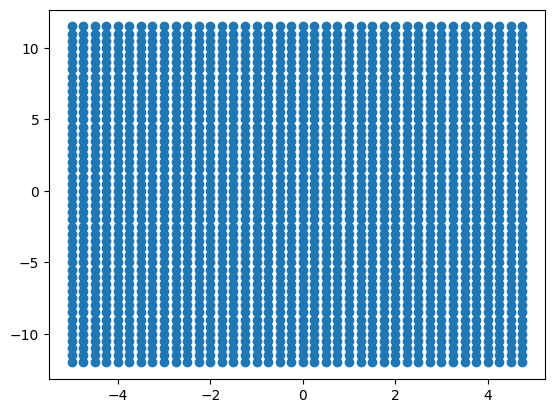

In [155]:
import itertools
r_vals = np.arange(-5, 5, 0.25) # np.append(np.arange(-3, -0.2, 0.2), np.arange(0.5, 10, 0.5))
eta_vals = np.arange(-12, 12, 0.5) # np.append(np.linspace(-5, -0.5, 10), np.linspace(0, 5, 10))
resx, resy = np.meshgrid(r_vals, eta_vals)
plt.scatter(resx, resy)

In [248]:
df[df['% error'] > 20]

,r,eta,beta,beta+1/r,empirical_mean,empirical_var,computed_var,% error,cond_computed
7,-4.0,-5.3,0.95,0.7,0.094757,1.327579,1.90812,43.729273,0.0
9,-4.0,-5.1,0.9,0.65,0.193924,1.50562,2.075707,37.863905,0.0
10,-4.0,-5.0,0.875,0.625,-0.211984,1.683642,2.175406,29.208324,0.0
15,-4.0,-4.5,0.75,0.5,-0.181653,1.446639,2.958675,104.520585,0.0
16,-4.0,-4.4,0.725,0.475,-0.075574,5.723698,3.216234,43.808459,0.0
...,...,...,...,...,...,...,...,...,...
7328,7.95,2.8,0.540881,0.666667,-0.083753,0.930217,0.714173,23.225117,0.0
7335,7.95,3.5,0.628931,0.754717,0.039453,0.629846,0.760575,20.755642,0.0
7344,7.95,4.4,0.742138,0.867925,0.166024,0.646979,0.812017,25.509014,0.0
7354,7.95,5.4,0.867925,0.993711,-0.00476,0.703499,0.861171,22.412587,0.0


In [321]:
def sample_prior(r, eta, size=1):
    '''
    Samples from prior distribution of signal x
    r : shape parameter, must be nonzero
    eta : shape parameter, controls roundedness of peak, must be > 0
    size : integer specifying number of samples required
    Note that the model is paramterized such that the generalized gamma variables are the variances (not the standard deviation)
    '''
    vars = stats.gengamma.rvs(a = (eta + 1.5)/r, c = r, size = size)
    x = np.random.normal(scale = np.sqrt(vars), size=size)
    return x

inf


<Axes: xlabel='r', ylabel='eta'>

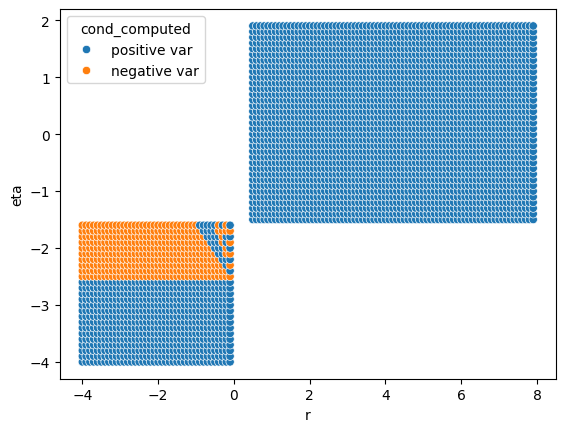

In [337]:
np.seterr(divide = 'ignore')
np.seterr(invalid = 'ignore') 
cond1, cond2, cond3 = [], [], []

def get_prior_var(r, eta):
    beta = (eta + 1.5)/r
    return scipy.special.gamma(beta + 1/r) / scipy.special.gamma(beta)

r_vals = np.append(np.arange(-4, 0, 0.1), np.arange(0.5, 8, 0.1))
eta_vals = np.arange(-4, 2, 0.1) 

df = pd.DataFrame(columns = ['r', 'eta', 'beta', 'beta+1/r', 'empirical_mean', 'empirical_var', 'computed_var', '% error'])
i = 0
for r in r_vals:
    for eta in eta_vals:

        beta = (eta+1.5)/r
        
        if beta <= 0:
            cond1.append((r, eta))
            continue
        
        if beta + 1/r <= 0:
            cond2.append((r, eta))
            # continue

        if 0 < beta + 1/r <= 1:
            cond3.append((r, eta))
            # continue

        x = sample_prior(r, eta, 100000)
        mu = np.mean(x)
        var = np.var(x)

        computed_var = get_prior_var(r, eta)
        
        df.loc[i, ] = r, eta, (eta+1.5)/r, ((eta+1.5)/r + 1/r), mu, var, computed_var, np.abs(var - computed_var)/var * 100
        i += 1

print(df['% error'].mean())

def mapping(x):
    if x < 0:
        return 'negative var'
    else:
        return 'positive var'


df['cond_computed'] = df['computed_var'].apply(mapping)
sns.scatterplot(data=df, x = 'r', y = 'eta', hue = 'cond_computed')

<Axes: xlabel='r', ylabel='eta'>

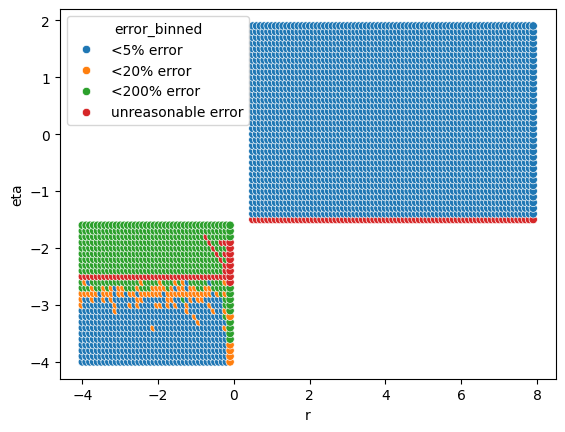

In [338]:
def mapping(x):
    if x < 5:
        return '<5% error'
    elif x < 20:
        return '<20% error'
    elif x < 200:
        return '<200% error'
    else:
        return 'unreasonable error'


df['error_binned'] = df['% error'].apply(mapping)
sns.scatterplot(data=df, x = 'r', y = 'eta', hue = 'error_binned')

In [294]:
df

,r,eta,beta,beta+1/r,empirical_mean,empirical_var,computed_var,% error,cond_computed,error_binned
0,-1.5,-4.0,1.666667,1.0,-0.071288,2.56372,2.967546,15.751583,positive var,negative var
1,-1.4,-4.0,1.785714,1.071429,-0.017747,2.368562,2.687663,13.472323,positive var,negative var
2,-1.4,-3.9,1.714286,1.0,-0.002317,2.150674,3.455162,60.654872,positive var,positive var
3,-1.3,-4.0,1.923077,1.153846,-0.028142,1.853056,2.381064,28.493886,positive var,negative var
4,-1.3,-3.9,1.846154,1.076923,-0.00845,1.796204,3.084428,71.719246,positive var,positive var
...,...,...,...,...,...,...,...,...,...,...
1060,4.15,1.8,0.795181,1.036145,0.042415,0.730006,0.770482,5.544596,positive var,negative var
1061,4.15,1.9,0.819277,1.060241,-0.002452,0.86838,0.784854,9.618558,positive var,negative var
1062,4.25,1.8,0.776471,1.011765,-0.027729,0.734893,0.761085,3.564145,positive var,negative var
1063,4.25,1.9,0.8,1.035294,0.03088,0.814117,0.775101,4.792434,positive var,negative var


<Axes: xlabel='r', ylabel='eta'>

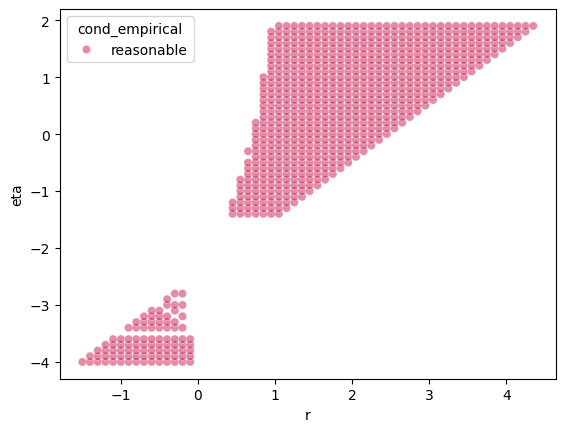

In [263]:
df['cond_empirical'] = df['empirical_var'].apply(mapping)
sns.scatterplot(data=df[df['% error'] < 10000000000], x = 'r', y = 'eta', hue = 'cond_empirical', alpha = 0.5, palette = 'rocket')